In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use(["science", "notebook", "grid"])

In [2]:
mish_data = pd.read_csv("/Users/archismanchakraborti/Desktop/python_files/ICPR/artifacts/MIT-BIH/MISH/MISH.log")
relu_data = pd.read_csv("/Users/archismanchakraborti/Desktop/python_files/ICPR/artifacts/MIT-BIH/RELU/RELU.log")
sigmoid_data = pd.read_csv("/Users/archismanchakraborti/Desktop/python_files/ICPR/artifacts/MIT-BIH/Sigmoid/Sigmoid.log")
tanh_data = pd.read_csv("/Users/archismanchakraborti/Desktop/python_files/ICPR/artifacts/MIT-BIH/Tanh/Tanh.log")
dsrelu_data = pd.read_csv("/Users/archismanchakraborti/Desktop/python_files/ICPR/artifacts/MIT-BIH/DSRELU/DSReLU.log")
leaku_relu = pd.read_csv("/Users/archismanchakraborti/Desktop/python_files/ICPR/artifacts/MIT-BIH/LeakyReLU/LeakyReLU.log")

In [3]:
def plot_metrics(data, metric_name, color_codes, plotting_order, axis, show_legend = False) -> None:
    for func_name, func_data in zip(plotting_order, data):
        axis.plot(func_data["Epoch"], func_data[metric_name], label=func_name, color=color_codes[func_name])
    if show_legend: axis.legend()
    return axis

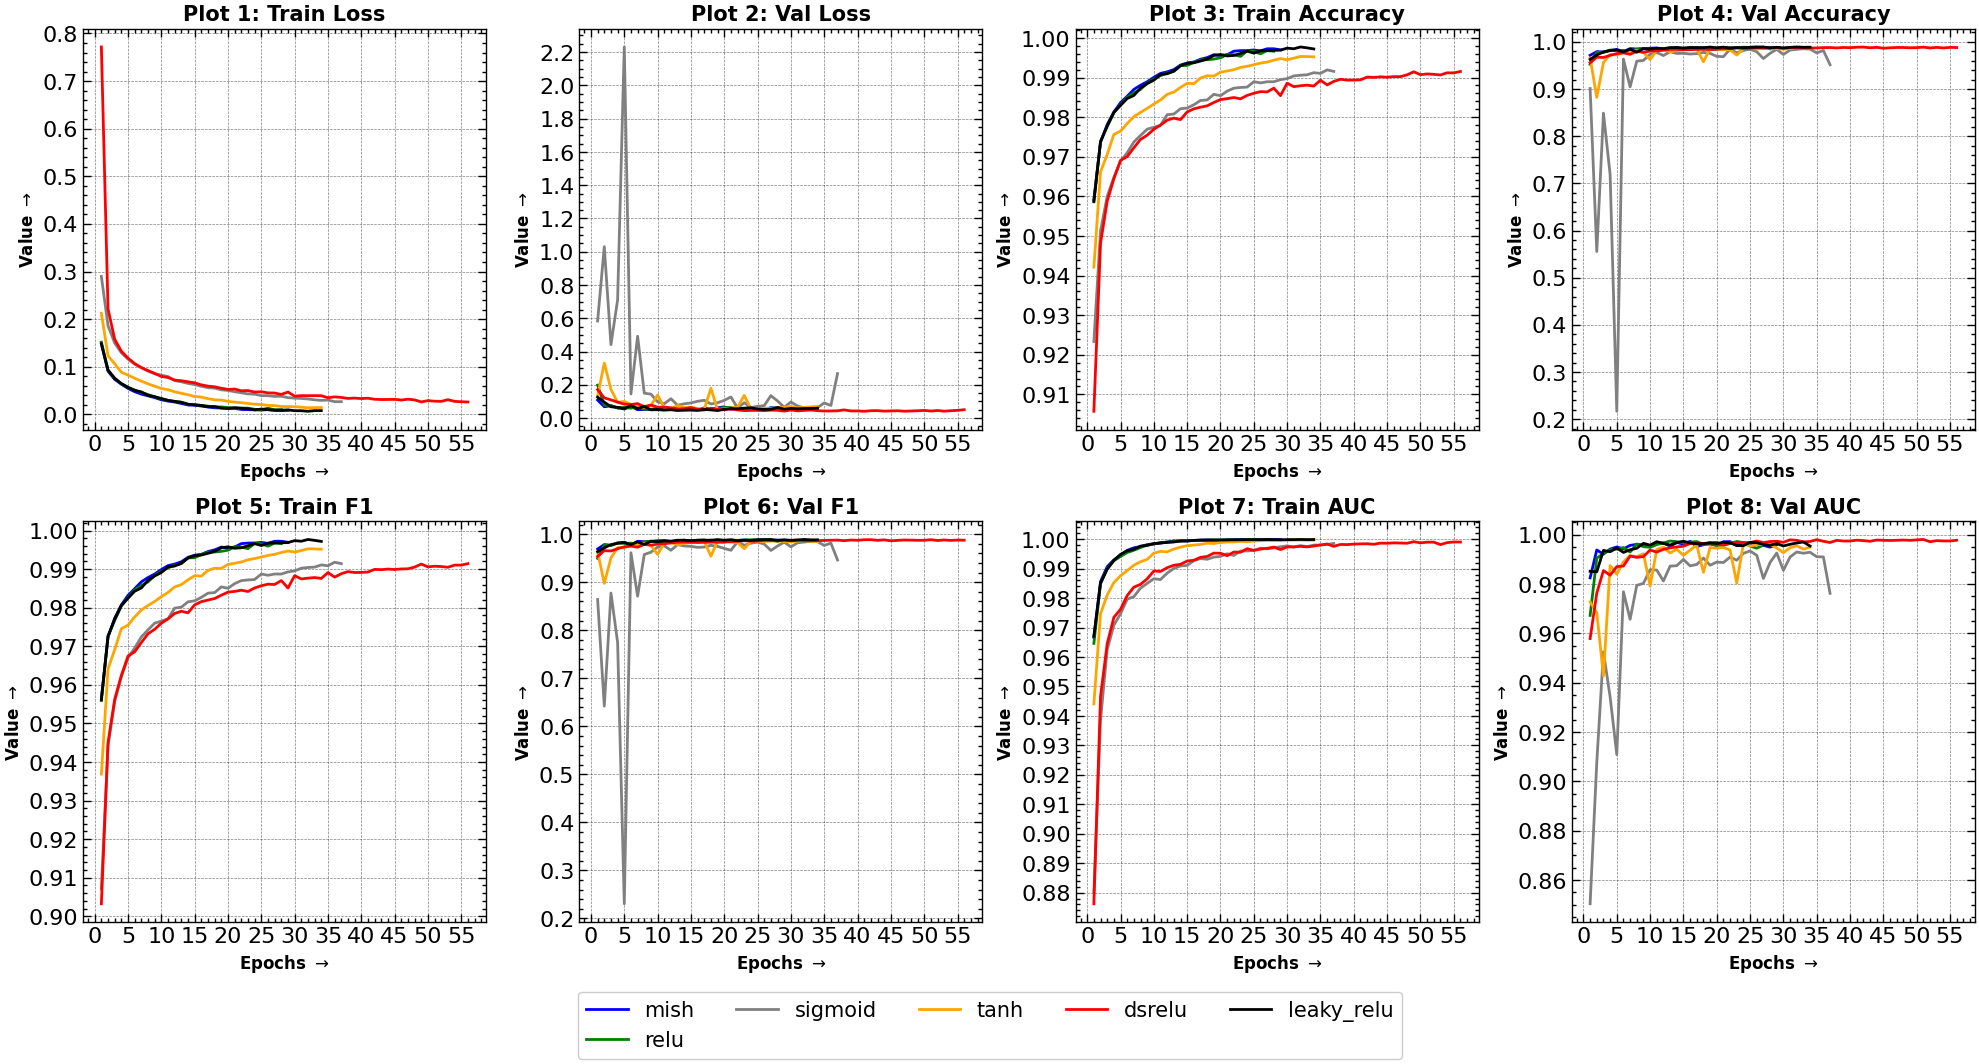

In [4]:
columns = ['Train Loss', 'Val Loss', 'Train Acc', 'Val Acc', 'Train F1', 'Val F1', 'Train AUC', 'Val AUC']
titles = ['Train Loss', 'Val Loss', 'Train Accuracy', 'Val Accuracy', 'Train F1', 'Val F1', 'Train AUC', 'Val AUC']
color_codes = {
    "mish" : "blue",
    "relu" : "green",
    "sigmoid" : "gray", 
    "tanh" : "orange", 
    "dsrelu" : "red", 
    "leaky_relu" : "black"}
plotting_order = ["mish", "relu", "sigmoid", "tanh", "dsrelu", "leaky_relu"]
data = [mish_data, relu_data, sigmoid_data, tanh_data, dsrelu_data, leaku_relu]

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = ax.flatten()

# Set titles
for idx, axi in enumerate(ax.flatten()):
    axi.set_title(f"Plot {idx+1}: {titles[idx]}", fontsize = 15, fontweight = 'bold')
    axi.locator_params(axis='both', nbins=15)
    axi.set_xlabel(r"Epochs $\rightarrow$", fontsize = 12, fontweight = 'bold')
    axi.set_ylabel(rf"Value $\rightarrow$", fontsize = 12, fontweight = 'bold')

axis1 = plot_metrics(data, columns[0], color_codes, plotting_order, ax1)
axis2 = plot_metrics(data, columns[1], color_codes, plotting_order, ax2)
axis3 = plot_metrics(data, columns[2], color_codes, plotting_order, ax3)
axis4 = plot_metrics(data, columns[3], color_codes, plotting_order, ax4)
axis5 = plot_metrics(data, columns[4], color_codes, plotting_order, ax5)
axis6 = plot_metrics(data, columns[5], color_codes, plotting_order, ax6)
axis7 = plot_metrics(data, columns[6], color_codes, plotting_order, ax7)
axis8 = plot_metrics(data, columns[7], color_codes, plotting_order, ax8)

handles = [plt.Line2D([0], [0], color=color_codes[func_name], label=func_name) for func_name in plotting_order]
labels = [h.get_label() for h in handles]
# Make figure legend at the bottom 
fig.legend(handles, labels, loc='lower center', ncol=5, fontsize = 15, bbox_to_anchor=(0.5, -0.08))

plt.tight_layout()

In [5]:
dsrelu_top_metrics = pd.read_csv("/Users/archismanchakraborti/Desktop/python_files/ICPR/artifacts/MIT-BIH/DSRELU/top_metrics.csv")
mish_top_metrics = pd.read_csv("/Users/archismanchakraborti/Desktop/python_files/ICPR/artifacts/MIT-BIH/MISH/top_metrics.csv")
relu_top_metrics = pd.read_csv("/Users/archismanchakraborti/Desktop/python_files/ICPR/artifacts/MIT-BIH/RELU/top_metrics.csv")
sigmoid_top_metrics = pd.read_csv("/Users/archismanchakraborti/Desktop/python_files/ICPR/artifacts/MIT-BIH/Sigmoid/top_metrics.csv")
tanh_top_metrics = pd.read_csv("/Users/archismanchakraborti/Desktop/python_files/ICPR/artifacts/MIT-BIH/Tanh/top_metrics.csv")
leaky_relu_top_metrics = pd.read_csv("/Users/archismanchakraborti/Desktop/python_files/ICPR/artifacts/MIT-BIH/LeakyReLU/top_metrics.csv")

dsrelu_top_metrics["Activation"] = "DSReLU"
mish_top_metrics["Activation"] = "Mish"
relu_top_metrics["Activation"] = "ReLU"
sigmoid_top_metrics["Activation"] = "Sigmoid"
tanh_top_metrics["Activation"] = "Tanh"
leaky_relu_top_metrics["Activation"] = "LeakyReLU"

In [6]:
combined_top_metrics = pd.concat([dsrelu_top_metrics, mish_top_metrics, relu_top_metrics, sigmoid_top_metrics, tanh_top_metrics, leaky_relu_top_metrics])

In [7]:
combined_top_metrics

,Train Acc,Val Acc,Train F1,Val F1,Train AUC,Val AUC,Activation
0,0.991448,0.987436,0.991333,0.987412,0.999177,0.997706,DSReLU
1,0.991163,0.988293,0.991064,0.987988,0.999071,0.997455,DSReLU
2,0.991534,0.987950,0.991441,0.987633,0.999059,0.997747,DSReLU
3,0.990806,0.987094,0.990691,0.986972,0.999020,0.997133,DSReLU
4,0.990906,0.988864,0.990777,0.988687,0.999015,0.998062,DSReLU
0,0.997259,0.987893,0.997253,0.987946,0.999902,0.994954,Mish
1,0.996716,0.988864,0.996708,0.988678,0.999896,0.997041,Mish
2,0.996959,0.988579,0.996948,0.988567,0.999887,0.996076,Mish
3,0.996788,0.988065,0.996778,0.987941,0.999877,0.995578,Mish
4,0.996802,0.987494,0.996795,0.987139,0.999873,0.996054,Mish
